# code review
- PEP8 compliance - spaces around operators FIXED
- dont use list use arrays when size is predetermined FIXED
- moved lines that do not depend on ff out of the ffs loop FIXED
- your fist savefig statement returned an error cause fig is not defined FIXED
- put counter so user knows how long its gonna be FIXED
- plot the firse derived product first, leff first then r which depends on leff FIXED

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Flux contribution of a flare corresponding to 10000K BB + MD spectrum with FF = 0.05. Expected = 0.5, Result = 0.5


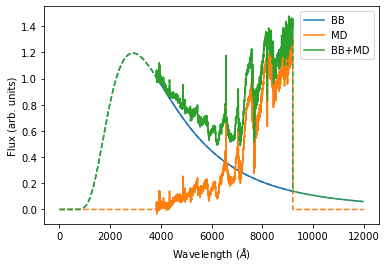

In [82]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from utils import *
from config import *
import globals
from importlib import reload
import matplotlib.pyplot as plt
from mdwarf_interp import mdwarf_interp

import warnings

def fxn():
    warnings.warn("runtime", RuntimeWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

globals.initialize()

TEMP = 10000

mdinterp = mdwarf_interp('m5.active.ha.na.k.fits', plotit=False)
md = mdinterp(WAVELENGTH)

bb = make_bb(WAVELENGTH, TEMP) * globals.BBnorm
md_bb = md + bb

def bb_fraction(md, T=10000, ff=globals.FF):
    bb = make_bb(WAVELENGTH, T) * globals.BBnorm
    ff = ff / globals.FF #makes ff = 1.0 by default
    md_bb = md + bb * ff
    return sed_integ(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]*ff) / sed_integ(WAVELENGTH[WMIN:WMAX],md_bb[WMIN:WMAX])

#TEST:
result = bb_fraction(md)
print('Flux contribution of a flare corresponding to 10000K BB + MD spectrum with FF = 0.05. Expected = 0.5, Result = {}'.format(result))

assert result == 0.5, "WARNING: FAILED NORMALIZATION TEST"

plt.plot(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX], c='C0', label='BB')
plt.plot(WAVELENGTH[WMIN:WMAX], md[WMIN:WMAX], c='C1', label='MD')
plt.plot(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]+md[WMIN:WMAX], c='C2', label='BB+MD')
plt.legend();
plt.plot(WAVELENGTH, bb, c='C0', ls='--', label='BB')
plt.plot(WAVELENGTH, md, c='C1', ls='--', label='MD')
plt.plot(WAVELENGTH, bb+md, c='C2', ls='--', label='BB+MD')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Flux (arb. units)')
plt.savefig('Figures/bb_calib.png', dpi=300, bbox_inches='tight');

In [4]:
#what is the fract of total MD flux + BB ff 5% if BB T = 5000, what is total flux contributed by BB?

print(sed_integ(WAVELENGTH, md), sed_integ(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]),sed_integ(WAVELENGTH[WMIN:WMAX], md_bb[WMIN:WMAX]))

2354.9463148098057 2354.9463148098052 4709.8926296196105


/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


in R DCR should be 57.1 arcsec:  55.90728686453404


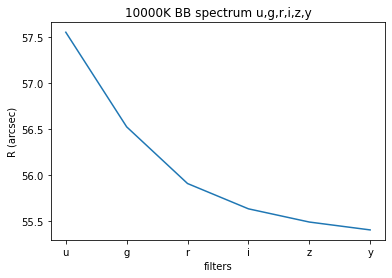

In [7]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']

weff = np.array([lamb_eff_BB(band=f, temp=TEMP, verbose=False) for f in filters])
plt.plot(dcr_offset(weff, airmass = globals.airmass))
plt.xlabel("filters")
plt.ylabel("R (arcsec)")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("{}K BB spectrum u,g,r,i,z,y".format(TEMP))
print("in R DCR should be 57.1 arcsec: ", dcr_offset(weff[2], airmass = globals.airmass))

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


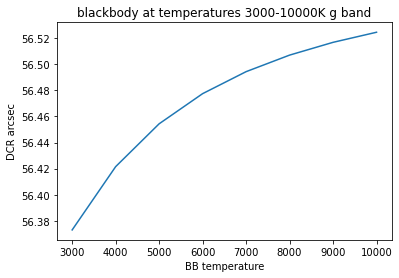

In [8]:
weff = np.array([lamb_eff_BB(band="g", temp=t, verbose=False) for t in range(3000,11000,1000)])
plt.plot(range(3000,11000,1000), dcr_offset(weff, airmass = globals.airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K g band");

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


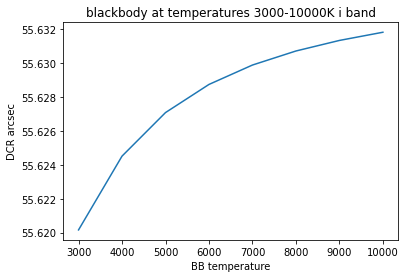

In [25]:
weff = np.array([lamb_eff_BB(band="i", temp=t, verbose=False) 
                 for t in range(3000,11000,1000)])
plt.plot(range(3000,11000,1000),dcr_offset(weff, airmass = globals.airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K i band");

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarnin

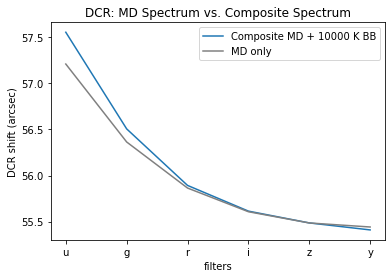

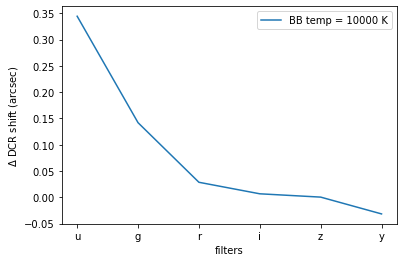

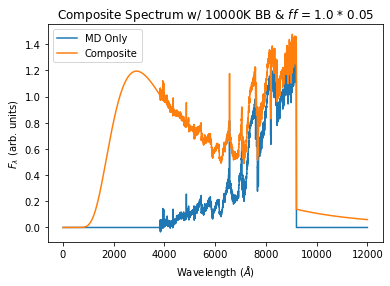

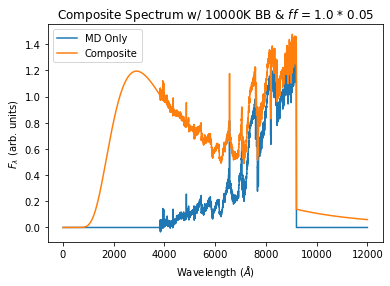

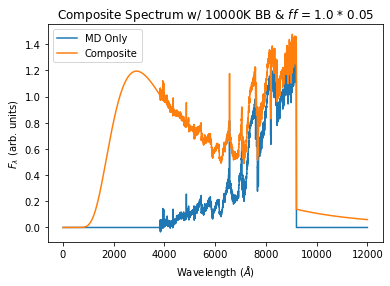

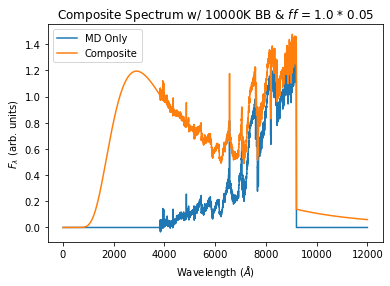

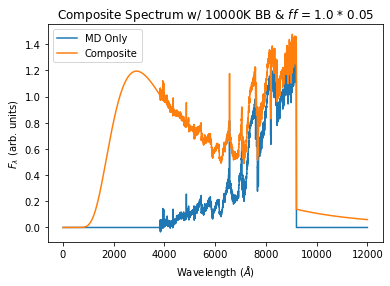

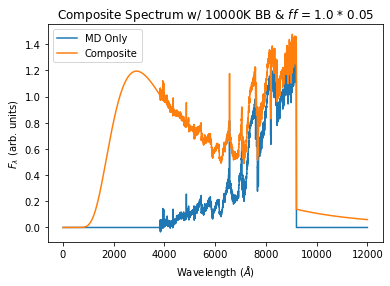

In [98]:
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

w_eff1 = np.array([lamb_eff_md(band=f, temp=TEMP, mdonly=True) for f in filters])
w_eff2 = np.array([lamb_eff_md(band=f, temp=TEMP, compplot=True) for f in filters])

ax1.plot(dcr_offset(w_eff2, airmass = globals.airmass), label='Composite MD + {} K BB'.format(TEMP))
ax1.plot(dcr_offset(w_eff1, airmass = globals.airmass), c='grey', label="MD only")

ax1.set_ylabel("DCR shift (arcsec)")
ax1.set_xlabel("filters")
ax1.set_xticks(range(6))
ax1.set_xticklabels(["u","g","r","i","z","y"])
ax1.set_title("DCR: MD Spectrum vs. Composite Spectrum")
ax1.legend()

ax2.plot(dcr_offset(w_eff2, airmass = globals.airmass) - dcr_offset(w_eff1, airmass = globals.airmass), label='BB temp = {} K'.format(TEMP))
ax2.set_ylabel(r"$\Delta$ DCR shift (arcsec)")
ax2.set_xlabel("filters")
ax2.set_xticks(range(6))
ax2.set_xticklabels(["u","g","r","i","z","y"])
ax2.legend()

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarnin

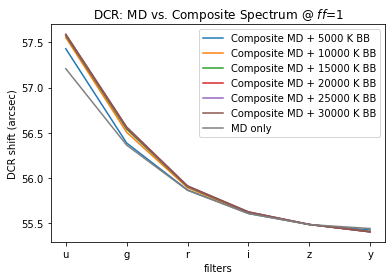

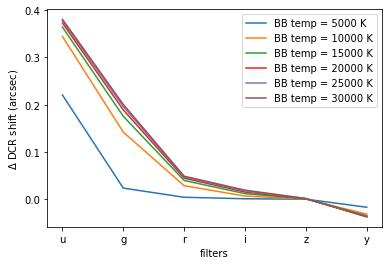

In [97]:
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

for temp in range(5000,35000,5000):

    w_eff1 = np.array([lamb_eff_md(band=f, temp=temp, mdonly=True) for f in filters])
    w_eff2 = np.array([lamb_eff_md(band=f, temp=temp) for f in filters])

    ax1.plot(dcr_offset(w_eff2, airmass = globals.airmass), label='Composite MD + {} K BB'.format(temp))
    ax2.plot(dcr_offset(w_eff2, airmass = globals.airmass) - dcr_offset(w_eff1, airmass = globals.airmass), label='BB temp = {} K'.format(temp))

ax1.plot(dcr_offset(w_eff1, airmass = globals.airmass), c='grey', label="MD only")
ax1.set_ylabel("DCR shift (arcsec)")
ax1.set_xlabel("filters")
ax1.set_xticks(range(6))
ax1.set_xticklabels(["u","g","r","i","z","y"])
ax1.set_title(r"DCR: MD vs. Composite Spectrum @ $ff$=1")
ax1.legend()


ax2.set_ylabel(r"$\Delta$ DCR shift (arcsec)")
ax2.set_xlabel("filters")
ax2.set_xticks(range(6))
ax2.set_xticklabels(["u","g","r","i","z","y"])
ax2.legend()

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


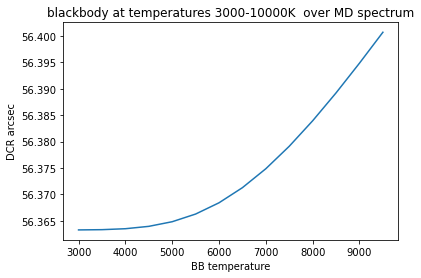

In [40]:
w_eff = np.array([lamb_eff_md(band='g', temp=t) for t in range(3000,10000,500)])
plt.plot(range(3000,10000,500), dcr_offset(w_eff, airmass = globals.airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K  over MD spectrum");

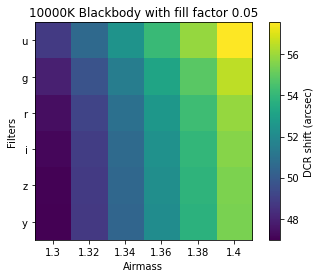

In [181]:
def gridplot(temp, ff):

        grid = np.zeros((6,6))

        ams = np.linspace(1.3,1.4,num=6,dtype='float') 

        for i, am in enumerate(ams):
            for j, f in enumerate(filters):
                w_eff = lamb_eff_md(band=f, temp=temp, ff=ff) 
                grid[i][j] = dcr_offset(w_eff, airmass=am)

        fig3, ax3 = plt.subplots(1,1)

        c = ax3.imshow(grid.T)

        ax3.set_xticks(range(6))
        ax3.set_xticklabels(np.round(ams, decimals=2))
        ax3.set_yticks(range(6))
        ax3.set_yticklabels(["u","g","r","i","z","y"])
        ax3.set_ylabel("Filters")
        ax3.set_xlabel("Airmass")
        ax3.set_title('{0}K Blackbody with fill factor {1}'.format(temp,ff))

        cbar = fig3.colorbar(c)
        cbar.set_label('DCR shift (arcsec)', rotation=90)

gridplot(10000, 0.05)

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


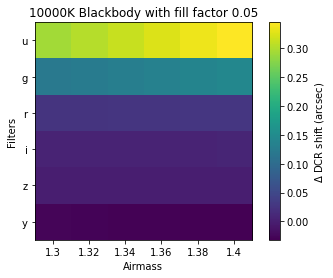

In [167]:
def deltagridplot(temp, ff=0.05):

        grid = np.zeros((6,6))

        ams = np.linspace(1.3,1.4,num=6,dtype='float') 

        for i, am in enumerate(ams):
                for j, f in enumerate(filters):
                        w_eff1 = lamb_eff_md(band=f, temp=temp, ff=ff, mdonly=True) 
                        w_eff2 = lamb_eff_md(band=f, temp=temp, ff=ff) 
                        grid[i][j] = dcr_offset(w_eff2, airmass=am) - dcr_offset(w_eff1,airmass=am)

        fig3, ax3 = plt.subplots(1,1)

        c = ax3.imshow(grid.T)

        ax3.set_xticks(range(6))
        ax3.set_xticklabels(np.round(ams, decimals=2))
        ax3.set_yticks(range(6))
        ax3.set_yticklabels(["u","g","r","i","z","y"])
        ax3.set_ylabel("Filters")
        ax3.set_xlabel("Airmass")
        ax3.set_title('{0}K Blackbody with fill factor {1}'.format(temp,ff))

        cbar = fig3.colorbar(c)
        cbar.set_label(r'$\Delta$ DCR shift (arcsec)', rotation=90)

deltagridplot(10000)